# 12.27 Lost baggage distribution
Williams, H. Paul. Model building in mathematical programming. John Wiley & Sons, 2013.

6台のバンを所有する小さな会社が、ロンドン地域の顧客が所有する紛失または遅延した手荷物を、ヒースロー空港から毎晩午後6時に発送する契約を多くの航空会社と結んでいます。契約では、各顧客は午後8時までに荷物を配達する必要があると規定されています。同社は、使用する必要のあるバンの最小数と、各バンがどの顧客にどのような順序で配達するかをアドバイスするために、毎晩迅速に解決できるモデルを必要としています。各バンに実際の容量制限はありません。 2時間以内に配達する必要があるすべての手荷物はバンに収容することができます。必要なバンの最小数を確認したら、解決策を探します。これにより、バンにかかる最大時間が最小限に抑えられます。

特定の夜に配達が必要な場所とそれらの間を移動する時間（分単位）を表12.24に示します。ドロップオフ時間は考慮されていません。便宜上、ヒースローが最初の場所と見なされます。

使用する必要のあるバンの数を最小限に抑え、この最小限の範囲内で、最長の配達にかかる時間を最小限に抑える最適化モデルを策定します。

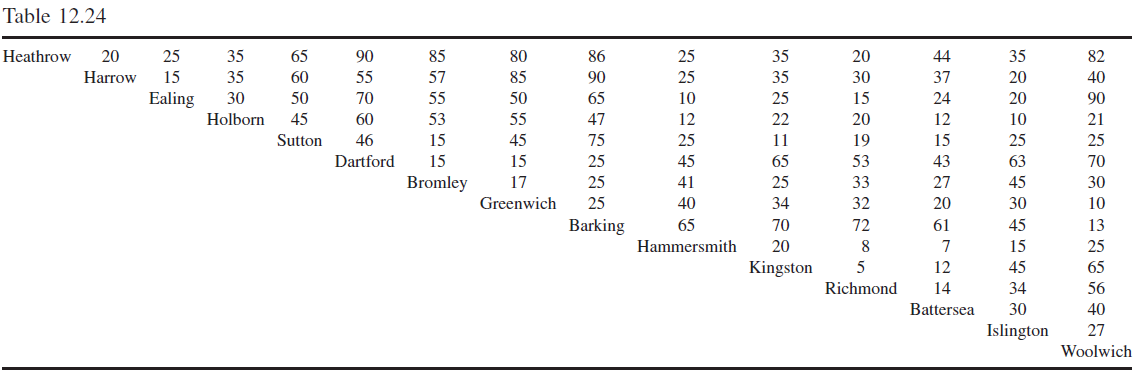

## 方針
全体の問題を以下の二段階に分割する。

1. 実行可能な経路の列挙
2. 列挙した経路の中から最適な経路の組み合わせの選択

(1) は列生成法により行うのが望ましいが、まずはヒューリスティックで生成する。
以降では (2) について記述する。

## (2) 列挙した経路の中から最適な経路の組み合わせの選択
### 集合
- 顧客の集合 $\mathcal{C}$
- 列挙した経路の集合 $\mathcal{R}$

### 定数
- 経路 $r\in\mathcal{R}$ に顧客 $c\in\mathcal{C}$ が含まれているか否か $a_{rc}$

### 変数
- 経路 $r\in\mathcal{R}$ を使用するか否か $x_r$

### 目的関数
使用する車の台数の最小化。

$$
\min \sum_{r\in\mathcal{R}} x_r
$$

### 制約式
#### 必ず全ての顧客に 1 度は訪れる。
$$
^\forall c\in\mathcal{C}, \quad \sum_r a_{rc} x_r \geq 1
$$

#### 整数制約
$$
^\forall r\in\mathcal{R}, \quad x_r \in \{0, 1\}
$$

## (1) 実行可能な経路の列挙
まずは、列生成法により解くことを考える。

(2) の問題を線形緩和すると、次のようになる。

$$
\min \sum_{r\in\mathcal{R}} x_r \\
\text{s.t.} \quad ^\forall c\in\mathcal{C}, \quad \sum_r a_{rc} x_r \geq 1, \\
^\forall r\in\mathcal{R}, \quad 0 \leq x_r \leq 1
$$

ここで、$a_{rc}\in \{0, 1\}$ より、$x_r$ に 1 より大きい数字を入れる必要はない（1 を入れるのと 1 より大きい数を入れるのは制約条件の意味では同じであり、しかも目的関数的には $x_r$ は小さい方が良いため）。←※成立しない問題もありうる。その場合の双対の取り方。

したがって、$0\leq x_r$ だけ考えればよい。

$$
\min \sum_{r\in\mathcal{R}} x_r \\
\text{s.t.} \quad ^\forall c\in\mathcal{C}, \quad \sum_r a_{rc} x_r \geq 1, \\
^\forall r\in\mathcal{R}, \quad 0 \leq x_r.
$$


双対を取ると、

$$
\min \sum_{c\in\mathcal{C}} y_c \\
\text{s.t.} \quad ^\forall r\in\mathcal{R}, \quad\sum_c a_{rc} y_c \leq 1, \\
^\forall c\in\mathcal{C}, \quad 0 \leq y_c.
$$

ここで、双対問題と主問題の関係性から、主問題で解を改善するために変数を追加することは、双対問題においては制約を追加して解の質を下げることに相当する。そこで、主問題においてより良い解が得られる（すなわち、双対問題において既存の制約条件を満たさない）ような新しい経路 $r^\prime$ を追加することを考える。定義より、以下の式が成り立つ。

$$
\sum_c a_{r^\prime c} y_c > 1
$$

したがって、$r$ に関するその他の制約を満たし、かつ上記の式を満たすような経路 $r^\prime$ を見つければよい。そのためには、その他の制約を制約条件としたうえで、以下の目的関数を最小化するような $\alpha_c$ を求めればよい。

$$
\sum_c \alpha_c y_c
$$

あとは制約条件を書き下していく。

### もし※が不正だった場合
もし $x_r$ の上限も使わないといけなかった場合、双対を取りやすいように整理すると、次のようになる。

$$
\min \sum_{r\in\mathcal{R}} x_r \\
\text{s.t.} \quad ^\forall c\in\mathcal{C}, \quad \sum_r a_{rc} x_r \geq 1, \\
^\forall r\in\mathcal{R}, \quad -x_r \geq -1, \\
^\forall r\in\mathcal{R}, \quad 0 \leq x_r
$$

$\textbf{A} = [a_{rc}], ~\textbf{x} = [x_r], ~\textbf{1}_m = [1, \ldots, 1]^\top$ (1 が m 個)としたとき、1 つ目の制約式は次のように書ける。

$$
\textbf{A}^\top \textbf{x} \geq \textbf{1}_c
$$

また、単位行列 $\textbf{I}$ とすると、2 つ目の制約式は次のような式と解釈できる

$$
-\textbf{I}\textbf{x} \geq -\textbf{1}_r
$$

合わせると、

$$
[\textbf{A}, -\textbf{I}]^\top \textbf{x} \geq [\textbf{1}_r^\top, -\textbf{1}_c^\top]^\top.
$$

双対を取ると、次のようになる（？）

$$
\min \sum_{c\in\mathcal{C}} y_c - \sum_{r\in\mathcal{R}} z_r \\
\text{s.t.} \quad ^\forall r\in\mathcal{R}, \quad\sum_c a_{rc} y_c \leq 1, \\
^\forall c\in\mathcal{C}, \quad 0 \leq y_c, \\
^\forall r\in\mathcal{R}, \quad 0 \leq z_r,
$$



## (1) 実行可能な経路の列挙 別解
今回は列生成法の適用が可能だったため列生成法を使用したが、整数計画としての定式化が難しい場合は、ヒューリスティックスや動的計画法で列挙することもありうる？

In [1]:
import pandas as pd
import numpy as np
import pulp

## 集合

In [2]:
customers = [
    'Harrow',
    'Ealing',
    'Holborn',
    'Sutton',
    'Dartford',
    'Bromley',
    'Greenwich',
    'Barking',
    'Hammersmith',
    'Kingston',
    'Richmond',
    'Battersea',
    'Islington',
    'Woolwich'
]
places = ['Heathrow'] + customers

In [3]:
vehicles = [1, 2, 3, 4, 5, 6]

## 定数

In [4]:
M = 1e+5

In [5]:
n_vehicle_ub = 6

In [6]:
trans_time = pd.read_csv("trans_uc.csv", index_col=0)

## 変数

In [7]:
is_used = pd.Series(pulp.LpVariable.dicts("is_used", vehicles, lowBound=0, upBound=1, cat="Binary"), index=vehicles)

In [8]:
# n_vehicle = pulp.LpVariable("n_vehicle", lowBound=0, upBound=n_vehicle_ub, cat="Integer")

In [9]:
# visits[i, j, k] = 1, iff vehicle k goes directly from customer i to customer j.
idx = pd.MultiIndex.from_product((places, places, vehicles), names=["src", "dst", "veh"])
visits = pd.Series(pulp.LpVariable.dicts("visit", idx, lowBound=0, upBound=1, cat="Binary"), index=idx)

In [10]:
# has_visitied[i, k] = 1, iff vehicle k visits customer i, (apart from the depot)
idx = pd.MultiIndex.from_product((places, vehicles), names=["cust", "veh"])
has_visited = pd.Series(pulp.LpVariable.dicts("has_visited", idx, lowBound=0, upBound=1, cat="Binary"), index=idx)

In [11]:
# visited_at: time at which customer i is visited.
visited_at = pd.Series(pulp.LpVariable.dicts("visited_at", customers, cat="Continuous"), index=customers)

## 目的関数

In [12]:
model = pulp.LpProblem(sense=pulp.constants.LpMinimize)
model.setObjective(is_used.sum())

## 制約条件

In [13]:
for i in customers:
    for k in vehicles:
        model.addConstraint(has_visited.loc[i, k] <= is_used[k])

In [14]:
for k in vehicles:
    model.addConstraint(sum(trans_time.loc[i, j] * visits.loc[i, j, k]
                            for i in places for j in customers if i != j) <= 120)

In [15]:
# customer を訪れる車の総数は 1
for i in customers:
    model.addConstraint(has_visited.loc[i, :].sum() == 1)

In [16]:
# vehicle k を使うなら Heathrow を訪れる
model.addConstraint(has_visited.loc["Heathrow", :].sum() <= is_used.sum())

In [17]:
# vehicle k が customer i を訪れているなら、必ず一回入って一回出る
for i in places:
    for k in vehicles:
        model.addConstraint(visits.loc[i, :, k].sum() == has_visited.loc[i, k])
        model.addConstraint(visits.loc[:, i, k].sum() == has_visited.loc[i, k])

In [18]:
# customer を訪れている車は、Heathrow も訪れる。
# for k in vehicles:
#     model.addConstraint(has_visited.loc[customers, k].sum() <= M * has_visited.loc["Heathrow", k])

In [19]:
# AIMMS Modeling Guide - Integer Programming Tricks
# https://download.aimms.com/aimms/download/manuals/AIMMS3OM_IntegerProgrammingTricks.pdf
# 7.4 Conditional constraints
# for k in vehicles:
    # if k <= n_vehicle:
    #     model.addConstraint(has_visited.loc[i, :].sum() <= 1)
    # ↓変形
#     model.addConstraint(n_vehicle_ub * is_used[k] - 1 >= n_vehicle - k)
#     model.addConstraint(k >= n_vehicle - n_vehicle_ub * is_used[k] + 1)
#     model.addConstraint(has_visited.loc[i, :].sum() - 1 <= M * (1 - is_used[k]))

In [20]:
# for i in customers:
#     for j in customers:
#         for k in vehicles:
#             model.addConstraint(visited_at.loc[i] + trans_time.loc[i, j] <= visited_at.loc[j] + M * (1 - visits.loc[i, j, k]))

In [21]:
# for i in customers:
#      model.addConstraint(visited_at.loc[i] <= 120)

In [22]:
model.solve()

1

In [23]:
def get_value(x):
    return x.value()

In [24]:
visits.apply(get_value).loc[:, :, 1].unstack()

dst,Barking,Battersea,Bromley,Dartford,Ealing,Greenwich,Hammersmith,Harrow,Heathrow,Holborn,Islington,Kingston,Richmond,Sutton,Woolwich
src,,,,,,,,,,,,,,,
Barking,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Battersea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bromley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dartford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ealing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Greenwich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hammersmith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Harrow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Heathrow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
has_visited.apply(get_value).unstack()

veh,1,2,3,4,5,6
cust,,,,,,
Barking,0.0,1.0,0.0,0.0,0.0,0.0
Battersea,0.0,1.0,0.0,0.0,0.0,0.0
Bromley,0.0,1.0,0.0,0.0,0.0,0.0
Dartford,0.0,1.0,0.0,0.0,0.0,0.0
Ealing,0.0,1.0,0.0,0.0,0.0,0.0
Greenwich,0.0,1.0,0.0,0.0,0.0,0.0
Hammersmith,0.0,1.0,0.0,0.0,0.0,0.0
Harrow,0.0,1.0,0.0,0.0,0.0,0.0
Heathrow,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
def move(src, k):
    print(f"{src} -> ", end="")
    idx = np.argwhere(visits.loc[src, :, k].apply(get_value).to_numpy())[0, 0]
    dst = places[idx]
    if dst == "Heathrow":
        print(dst)
    else:
        move(dst, k)

In [27]:
for k in vehicles:
    print(f"{k}: ", end="")
    move("Heathrow", k)

1: Heathrow -> 

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
visited_at.apply(get_value)